In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('upa_event_ts.csv')
df = df.sort_values(by=['datetime'])

In [3]:
df.head(2)

,datetime,code,day,hour,minute,day_name,datetime.1,count,date,month
0,1535414421259,combinedproducts-search-e-flightresults-filter...,27,20,0,Monday,1535414421259,1,2018-08-27 20:00:21.259,8
1,1535414451815,transfers-checkout-e-credit-card-completed,27,20,0,Monday,1535414451815,2,2018-08-27 20:00:51.815,8


In [4]:
def get_ts(code,df):
    values = np.float32(df[df.code == code]['count'].values)
    dim = values.shape[0]
    index = np.int64(np.array([x for x in range(1,dim+1)]))
    index = index.reshape(1,dim)
    values = values.reshape(1,dim)
    return (index, values)

In [5]:
def generate_timeseries_csv():
    codes = ['cars-search','cars-checkout','cars-thanks', 'hotels-search','hotels-checkout','hotels-thanks','flights-search','flights-checkout','flights-thanks']
    for code in codes:
        x_ts, y_ts = get_ts(code, df)
        t = pd.Series(data=y_ts.flat, index=x_ts.flat)
        t.to_csv(code + ".csv")

In [6]:
x_ts, y_ts = get_ts('cars-checkout',df)

In [11]:
LEARNING_RATE = 1.0
PERIOD = 1008
PI = np.pi
ALPHA_REG = 0.08

In [12]:
x = tf.constant(x_ts,dtype=tf.float32)

y = tf.constant(y_ts,dtype=tf.float32)

multipliers = tf.constant([(x*2*PI)/PERIOD for x in range(1,PERIOD)], dtype=tf.float32)

amplitudes_cos = tf.Variable(tf.random_uniform([1, PERIOD-1], -10, 10, seed=42))

amplitudes_sin = tf.Variable(tf.random_uniform([1, PERIOD-1], -10, 10, seed=42))

bias = tf.Variable(tf.zeros([1]))

sin_part = tf.reduce_sum(tf.sin(tf.transpose(x) * multipliers) * amplitudes_sin, 1)

cos_part = tf.reduce_sum(tf.cos(tf.transpose(x) * multipliers) * amplitudes_cos, 1)

y_pred = sin_part + cos_part + bias

error = y_pred - y

regularizer = ALPHA_REG * tf.nn.l2_loss(amplitudes_cos) + ALPHA_REG * tf.nn.l2_loss(amplitudes_sin)

mse = tf.reduce_mean(tf.square(error) + regularizer, name="mse")

op = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(mse)

In [13]:
n_epochs = 1000
init = tf.global_variables_initializer()
sess = tf.Session()
with tf.Session() as sess:
        sess.run(init)
        for epoch in range(n_epochs):
            sess.run(op)
            print("epoch %s, mse = %s " % (epoch, mse.eval()))
        y_p = y_pred.eval()

epoch 0, mse = 30956.492 
epoch 1, mse = 21967.352 
epoch 2, mse = 15915.034 
epoch 3, mse = 12107.178 
epoch 4, mse = 9907.159 
epoch 5, mse = 8784.422 
epoch 6, mse = 8315.082 
epoch 7, mse = 8179.5005 
epoch 8, mse = 8157.6567 
epoch 9, mse = 8118.829 
epoch 10, mse = 7999.2866 
epoch 11, mse = 7778.0366 
epoch 12, mse = 7459.9004 
epoch 13, mse = 7064.189 
epoch 14, mse = 6617.45 
epoch 15, mse = 6148.024 
epoch 16, mse = 5681.3916 
epoch 17, mse = 5238.0835 
epoch 18, mse = 4832.7446 
epoch 19, mse = 4473.8135 
epoch 20, mse = 4164.009 
epoch 21, mse = 3901.8757 
epoch 22, mse = 3683.36 
epoch 23, mse = 3501.851 
epoch 24, mse = 3348.4248 
epoch 25, mse = 3213.6228 
epoch 26, mse = 3089.7512 
epoch 27, mse = 2971.57 
epoch 28, mse = 2855.669 
epoch 29, mse = 2739.7815 
epoch 30, mse = 2622.7737 
epoch 31, mse = 2504.9995 
epoch 32, mse = 2387.8677 
epoch 33, mse = 2272.9924 
epoch 34, mse = 2161.6965 
epoch 35, mse = 2054.9756 
epoch 36, mse = 1953.5961 
epoch 37, mse = 1858.0834 

epoch 300, mse = 225.01506 
epoch 301, mse = 224.98592 
epoch 302, mse = 224.999 
epoch 303, mse = 225.02263 
epoch 304, mse = 225.01375 
epoch 305, mse = 224.99796 
epoch 306, mse = 225.0142 
epoch 307, mse = 225.04008 
epoch 308, mse = 225.04243 
epoch 309, mse = 225.03395 
epoch 310, mse = 225.03058 
epoch 311, mse = 225.0216 
epoch 312, mse = 225.00626 
epoch 313, mse = 225.00153 
epoch 314, mse = 225.0083 
epoch 315, mse = 225.00807 
epoch 316, mse = 224.99365 
epoch 317, mse = 224.98015 
epoch 318, mse = 224.98155 
epoch 319, mse = 224.9912 
epoch 320, mse = 224.99408 
epoch 321, mse = 224.98766 
epoch 322, mse = 224.98137 
epoch 323, mse = 224.98018 
epoch 324, mse = 224.98094 
epoch 325, mse = 224.98157 
epoch 326, mse = 224.98216 
epoch 327, mse = 224.9804 
epoch 328, mse = 224.9755 
epoch 329, mse = 224.9724 
epoch 330, mse = 224.97426 
epoch 331, mse = 224.97655 
epoch 332, mse = 224.97493 
epoch 333, mse = 224.97224 
epoch 334, mse = 224.97258 
epoch 335, mse = 224.97443 
e

epoch 596, mse = 225.0917 
epoch 597, mse = 225.10176 
epoch 598, mse = 225.103 
epoch 599, mse = 225.08865 
epoch 600, mse = 225.06075 
epoch 601, mse = 225.03462 
epoch 602, mse = 225.02621 
epoch 603, mse = 225.03587 
epoch 604, mse = 225.04762 
epoch 605, mse = 225.0441 
epoch 606, mse = 225.02454 
epoch 607, mse = 225.00552 
epoch 608, mse = 224.99898 
epoch 609, mse = 225.00046 
epoch 610, mse = 225.00052 
epoch 611, mse = 224.99796 
epoch 612, mse = 224.99843 
epoch 613, mse = 225.00322 
epoch 614, mse = 225.0071 
epoch 615, mse = 225.00626 
epoch 616, mse = 225.0029 
epoch 617, mse = 225.00221 
epoch 618, mse = 225.00635 
epoch 619, mse = 225.01282 
epoch 620, mse = 225.01765 
epoch 621, mse = 225.02013 
epoch 622, mse = 225.02312 
epoch 623, mse = 225.02829 
epoch 624, mse = 225.03247 
epoch 625, mse = 225.0306 
epoch 626, mse = 225.02144 
epoch 627, mse = 225.00955 
epoch 628, mse = 225.00156 
epoch 629, mse = 225.0009 
epoch 630, mse = 225.00642 
epoch 631, mse = 225.01393 


epoch 892, mse = 225.04588 
epoch 893, mse = 225.03879 
epoch 894, mse = 225.02754 
epoch 895, mse = 225.01996 
epoch 896, mse = 225.0165 
epoch 897, mse = 225.0132 
epoch 898, mse = 225.00777 
epoch 899, mse = 225.00188 
epoch 900, mse = 224.99811 
epoch 901, mse = 224.99689 
epoch 902, mse = 224.99614 
epoch 903, mse = 224.99399 
epoch 904, mse = 224.99042 
epoch 905, mse = 224.98701 
epoch 906, mse = 224.985 
epoch 907, mse = 224.98413 
epoch 908, mse = 224.98318 
epoch 909, mse = 224.98149 
epoch 910, mse = 224.97954 
epoch 911, mse = 224.9783 
epoch 912, mse = 224.9783 
epoch 913, mse = 224.9792 
epoch 914, mse = 224.98032 
epoch 915, mse = 224.98094 
epoch 916, mse = 224.98099 
epoch 917, mse = 224.98068 
epoch 918, mse = 224.98033 
epoch 919, mse = 224.9802 
epoch 920, mse = 224.98056 
epoch 921, mse = 224.98154 
epoch 922, mse = 224.98315 
epoch 923, mse = 224.9851 
epoch 924, mse = 224.98708 
epoch 925, mse = 224.98889 
epoch 926, mse = 224.99072 
epoch 927, mse = 224.99306 
e

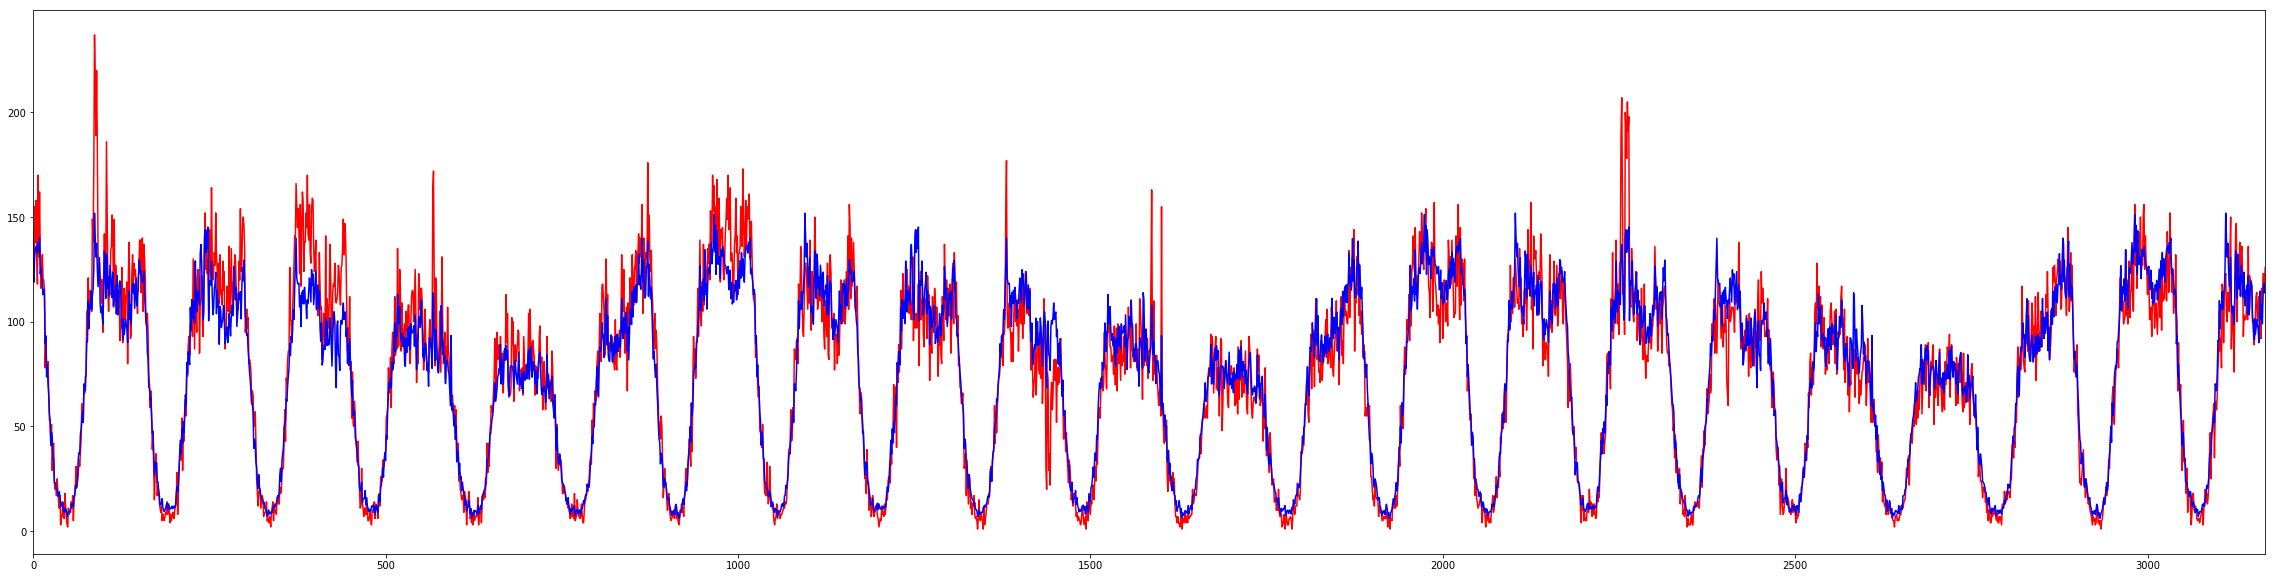

In [14]:
plt.figure(figsize=(40,10))
sbn.tsplot(y_ts, color="red")
sbn.tsplot(y_p, color="blue")

In [33]:
s = pd.Series()

In [ ]:
s.to_csv